<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Sample Blogging Exercise

_Author: Ben Shaver (DC)_
---


<a id=goals></a>

##  Overview

A great way to build your skills, portfolio, and online presence as a data scientist is to regularly play with new datasets and publish interesting observations you have made. Every Monday afternoon, you'll be examining a dataset of your choosing in order to practice this skill. Below are a series of questions to get you started. You may use this notebook as a template to complete the exercise every week.

For this exercise, you are highly encouraged to use a 'fresh' dataset like one featured in [Data is Plural](https://tinyletter.com/data-is-plural/letters/).  

## Required Objectives

Every monday, slack the dataset you have chosen to Ben by 10 am. You are required to examine a different dataset every week.


## Additional Resources

[100 Interesting Datasets for Statisticians](http://rs.io/100-interesting-data-sets-for-statistics/)

[Open Data Inception - 2600+ Open Data Portals Around the World](https://opendatainception.io/)

[Data For Everyone Library](https://www.crowdflower.com/data-for-everyone/)

[Our World in Data](https://ourworldindata.org/)

[Machine Learning Friendly Public Datasets](https://www.kaggle.com/annavictoria/ml-friendly-public-datasets/)

[Top Datasets on r/Datasets](https://www.reddit.com/r/datasets/top/?sort=top&t=all)





In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='Data Cleaning'></a>
## Data Cleaning

---


### Data Description

Begin with a short description of your dataset. Where did you get it? (Provide a link.) What does it show?

What are the observational units? What are the variables? (If your dataset has many variables, try and focus on just 5-10 for the purposes of this exercise.)

Is your data tidy? Is each row an observation and each column a variable?

In [ ]:
# My data comes from the Open University Learning Analytics dataset. Specifically,
# I'm using the Studentinfo table, which contains demographic data on students 
# who took courses remotely via the Open University. 

# The observational units are students. Variables include which course the student
# was taking, their age, geographic region, highest education attained, the number
# of credits the student is currently enrolled in, and the final result of the
# student in that module. Some students may show up more than once if they are enrolled
# in more than one module.

In [4]:
df = pd.read_csv('assets/Studentinfo.csv')

In [7]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
df.shape

(32593, 12)

### Data Types and Missing Values

What data type is each column? Are they what you expect?

Are there any null values? What about missing values or impossible values?

(Don't go down too many rabbit holes here. In a real project, you'd want to check all the variables for outliers and make sure every column is the right data type. For this exercise, it is OK to ignore some variables that are giving you trouble if you feel you can make interesting observations using the other variables.)

In [6]:
df.dtypes

# Basically, the data types are what I expect. Age is captured as a categorical
# variable, so it is a string. Disability is also a string, although it could be
# encoded as boolean instead.

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

In [9]:
# There are null values in my dataset:
df.isnull().sum().sum() > 0 

True

In [10]:
# They're all in the 'depravation band' column. This is convenient because
# we can just ignore that one for now.
df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [12]:
df[['num_of_prev_attempts','studied_credits']].min()
# Minimums of numerical columns look sensible:

num_of_prev_attempts     0
studied_credits         30
dtype: int64

In [13]:
df[['num_of_prev_attempts','studied_credits']].max()
# The maximum value for enrolled credits looks a little high.
# But this is an online university... Maybe a lot of students sign
# up for more courses than they ever plan to complete?

num_of_prev_attempts      6
studied_credits         655
dtype: int64

<a id='EDA'></a>
## Exploratory Data Analysis

---


What exactly are you trying to figure out using this data? What is your [population of interest](https://www.quora.com/What-is-the-population-of-interest-in-statistics)?

What are some questions you could ask of this data? Write down a few questions before you write another line of code.

In [ ]:
# My population of interest are students of the Open University, a distance 
# learning institution in the UK. I'm trying to figure out what patterns in
# student demographics are associated with module performance.

# Some questions I could ask of this data:
## Are students with higher educational attainment more likely to pass a module?
## Are students with a disability less likely to enroll in a lot of modules at the same time?
## Which region in the UK performs the best? Which has the oldest enrolled students?

Of the questions you've brainstormed, which are the easiest to answer? Which are the hardest?

What answers would surprise you? For which questions do you lack strong pre-existing opinions?

In [ ]:
# Since students either have a disability, or don't, it would be really easy to see
# if the average number of courses a student with a disability has is less than the
# average number for a student without a disability.

# Since age is categorical in this dataset, it would require some munging in order to 
# figure out which region has the oldest students. I would have to decide what counts
# as 'old,' maybe.

# I would be surprised if students with higher educational attainment aren't more likely
# to pass a module. I don't really know which region in the UK has students who are more
# likely to pass. It would be interesting to find out.

Go ahead and answer a few of the questions you've brainstormed. Focus on the low-hanging fruit: questions which you can begin to answer in just a few minutes, but that would be informative, surprising, or interesting.

Use the tools of desriptive statistics and exploratory visualization at increasting levels of complexity:

* Begin by examining the distribution of the variables you're interested in. Create historams, box plots, or count plots (in the case of categorical variables). Which variables have the highest variance? 
* Examine the relationship between pairs of variables. Generate scatterplots and compute correlations between two numerical columns. Make cross tabulations with two categorical variables. Examine the distribution of numerical variables after you have subsetted on a categorical variable.
* If you like, examine the relationship between two variables after you have controlled for a third. Subset your data on one variable and create a scatter plot which shows the relationship between two others, for example.

In [14]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')

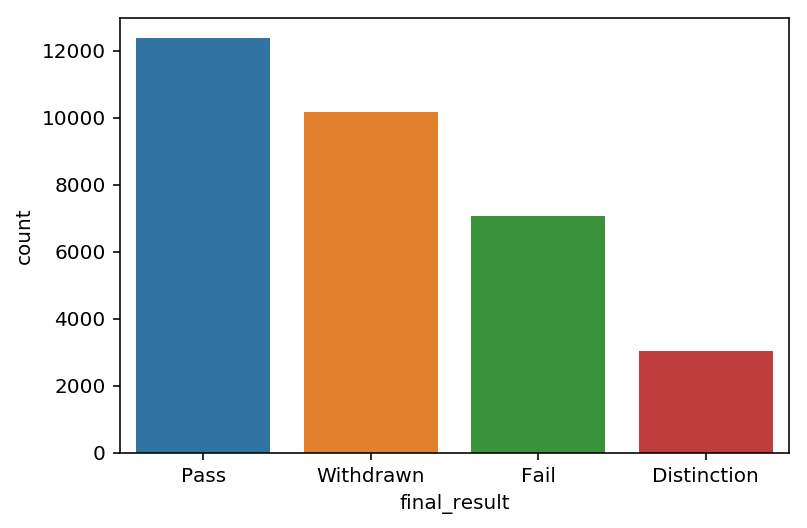

In [26]:
# Most people pass. A few get distinction. A lot withdraw.
_ = sns.countplot(x='final_result', data=df)

In [28]:
df['final_result'].value_counts()
7052/df.shape[0]

# It looks like only 22% of people who sign up for a course fail it.

0.2163654772497162

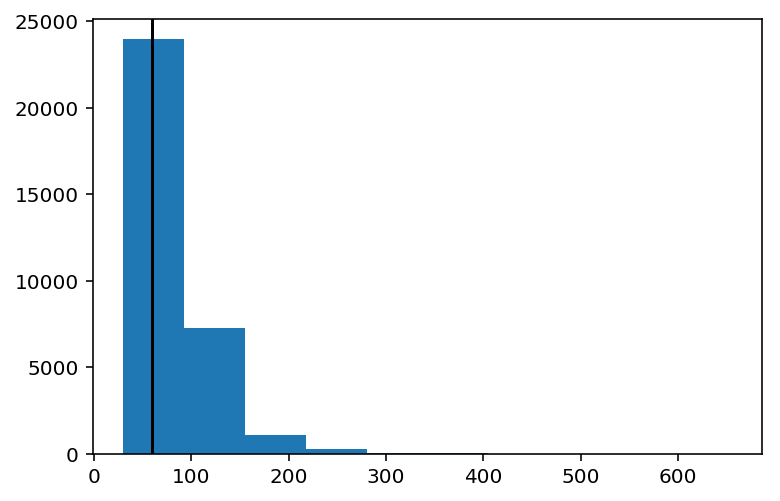

In [33]:
_ = plt.hist(df['studied_credits'])
_ = plt.axvline(df['studied_credits'].median(), color = 'black')

# The number of credits enrolled in is right-skewed, but the median number is 60.

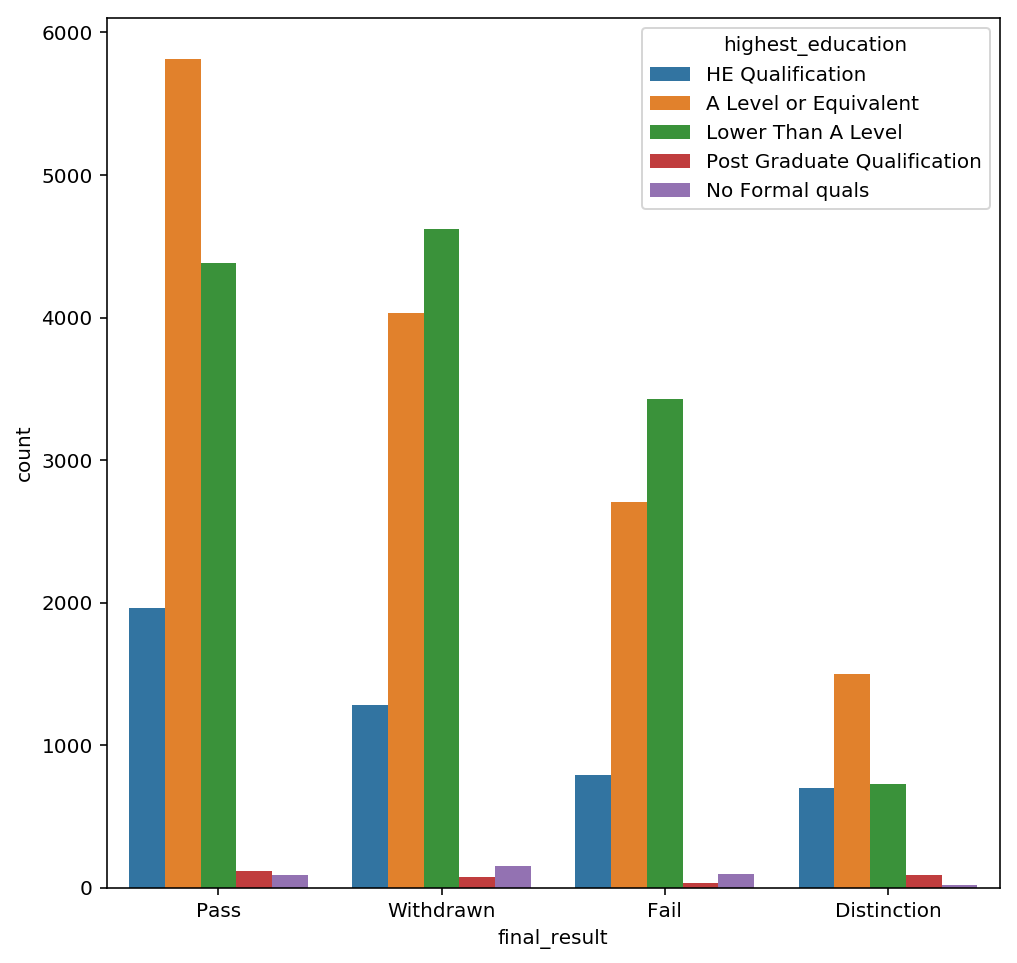

In [24]:
_ = plt.figure(figsize=(8,8))
_ = sns.countplot(x='final_result',data=df, hue='highest_education')

# Most people who pass or get distinction have their A-levels. Most people 
# who withdraw or fail don't. There are very few people with no formal
# qualifications or post-grad qualifications. People without qualifications
# are unlikely to earn distinction.

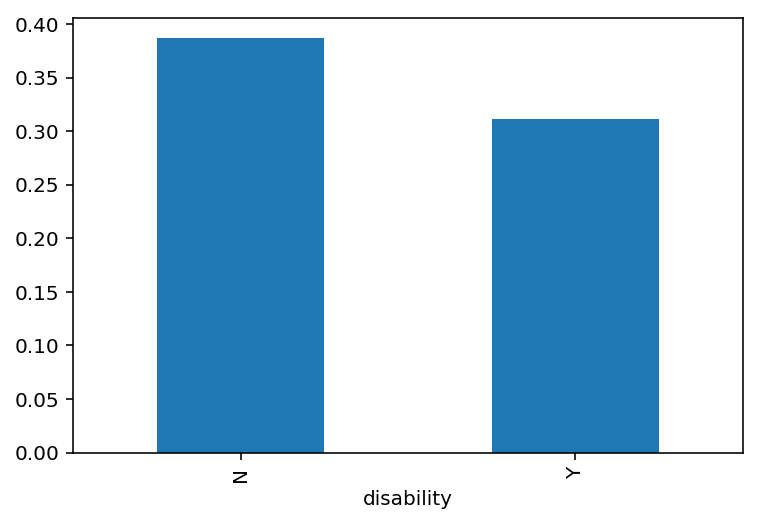

In [72]:
df['completed_course'] = [1 if x in ['Pass','Distinciton'] else 0 for x in df['final_result']]

_ = df.groupby('disability')['completed_course'].mean().plot(kind='bar')

# People without a disability are more likely to finish a course! But the difference is not drastic.

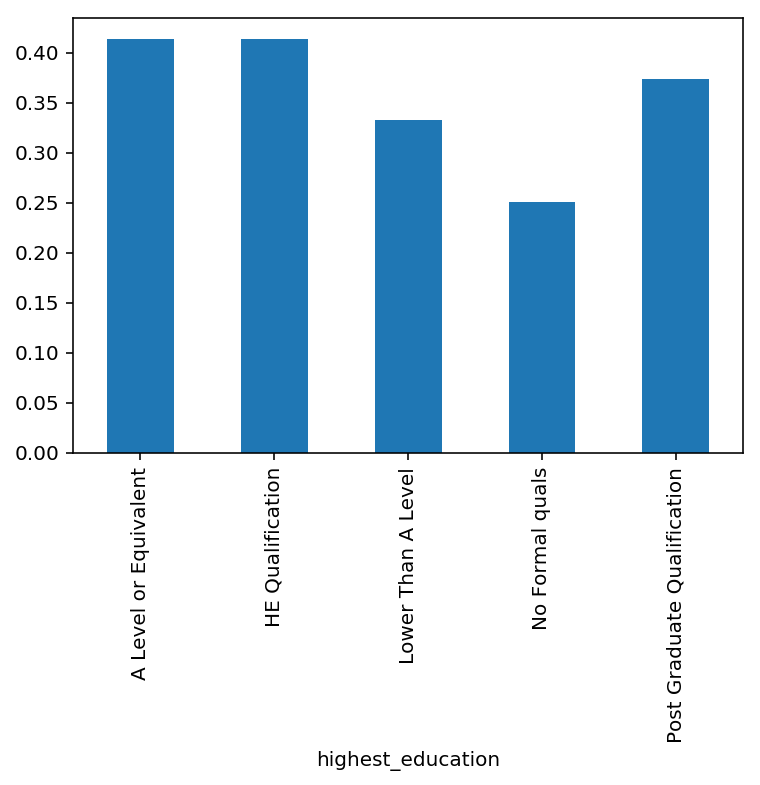

In [73]:
_ = df.groupby('highest_education')['completed_course'].mean().plot(kind='bar')

# People with post-grad qualifications are slightly *less* likely to finish
# a course than people with A-level or HE equivalent qualifications. People
# without formal qualifications are least likely to complete a course.

<a id='Visualization'></a>
## Visualization
---

You should have answered one or more interesting questions about your data. What most surprised you? What is your most important finding?

Think about how you might communicate these insights to a non-expert using visualization. (Refer to Joseph Nelson's [guest lecture](https://github.com/josephofiowa/ds-blogging).) Use descriptive axis labels and titles that capture the main point of each visualization. Someone looking at your visualization should understand what it is telling them in only a few seconds. 

Once you have created one or more visualizations, consult the Matplotlib or Seaborn documentation and play with a few parameters. Do they make your visualization clearer to a potential reader?

You've just spent an hour digging into this dataset. Imagine you have to explain what you've done and what you've learned to someone who doesn't actually care about data science, but they're curious about what the data might show. Write one or two short paragraphs summarizing what you have learned. Don't mention any data cleaning you did or questions you didn't answer. Data science isn't about you sounding smart. Therefore, avoid the temptation to "show your work."

In [ ]:
# What most surprised me was that people with post-grad qualifications are less likely to complete a course.
# But the most important finding is that people without formal qualifications are least likely.

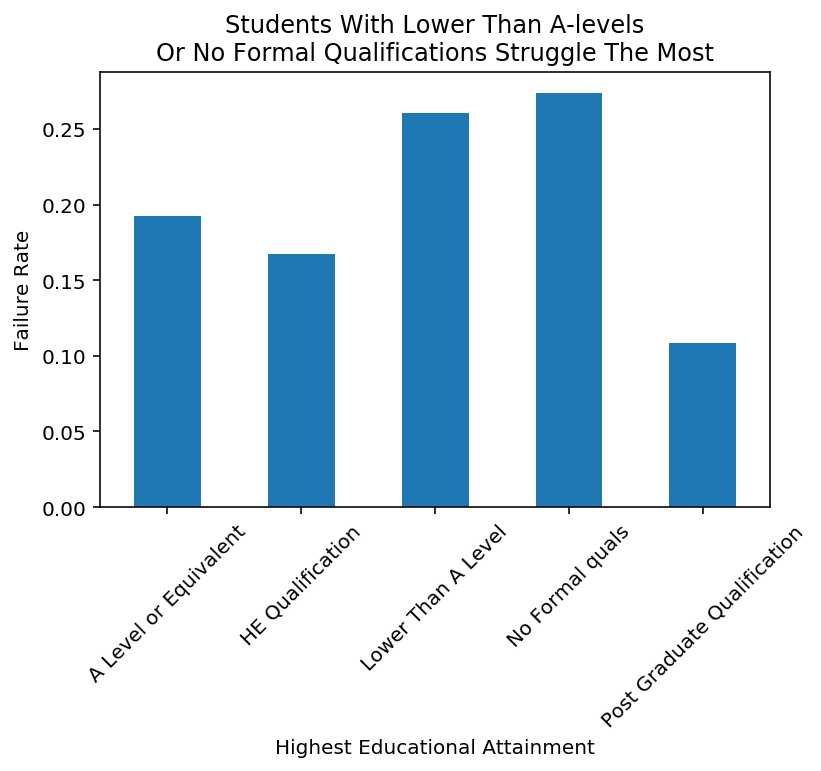

In [65]:
# It turns out that people with post-grad qualifications are actually unlikely to fail a course.

df['failed_course'] = [1 if x == 'Fail' else 0 for x in df['final_result']]

_ = df.groupby('highest_education')['failed_course'].mean().plot(kind='bar')
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Highest Educational Attainment')
_ = plt.ylabel('Failure Rate')
_ = plt.title('Students With Lower Than A-levels\nOr No Formal Qualifications Struggle The Most')

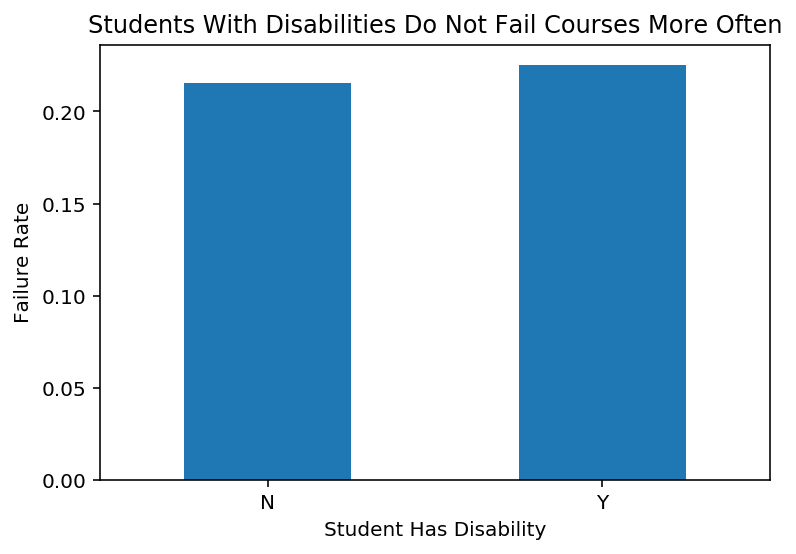

In [71]:
# Similarly, if we look at failure rates instead of just non-completion rates,
# it turns out that students with disabilities don't actually perform any worse.
# They just withdraw more often.

_ = df.groupby('disability')['failed_course'].mean().plot(kind='bar')
_ = plt.xticks(rotation=0)
_ = plt.xlabel('Student Has Disability')
_ = plt.ylabel('Failure Rate')
_ = plt.title('Students With Disabilities Do Not Fail Courses More Often')

In [ ]:
# Summary:

# I looked at a dataset of student enrolled in courses at the UK's Open University,
# which is a remote learning institution. It turns out that a student's previous level
# of educational attainment is associated with their course performance. Students
# with lower than A-levels or no qualifications at all tend to struggle the most,
# if you're looking at course failure rates. While students with post-graduate degrees
# do often withdraw from courses, they don't tend to fail them.

# Students with disabilities withdraw or fail more often than students without disabilities,
# but when you look closer it turns out that they don't tend to fail more often provided
# they stick it out to the end of the course. In that respect, they are like students
# with post-graduation qualifications.

Congratulations! You've just written a blog post.

Good science generates additional questions to be asked. If you had to spend eight hours with this dataset, what would you do with it? What kinds of models might you run on this data?

If you were to start over on this analysis, what would you have done differently? Just a few sentences is enough here.

In [ ]:
# If I had a lot more time with this dataset, I would build a model
# predicting whether a student is likely to withdraw from a course
# based on their demographic data. Open University could use it to 
# help support students who are likely to not make it to the end
# of the course, or to identify students who are likely to overreach.
#  
# If I were to do this analysis again, I would look more closely at
# how many credits a student is enrolled in. That might be an important
# factor in predicing whether a student is likely to withdraw. Additionally,
# if I controlled for that it might show that certain students are not
# more likely to withdraw all else being equal, but that they're more 
# likely to withdraw only if they've over-enrolled. It might just be that
# certain types of students sign up for more courses than they can
# reasonably handle.